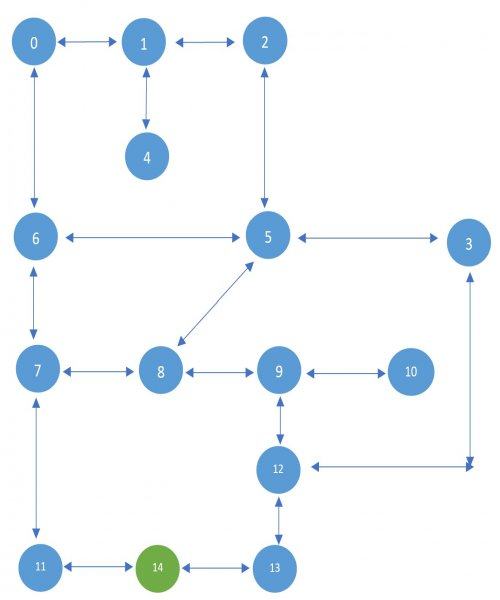

In [129]:
import numpy as np

Define R matrix

In [131]:
R=np.matrix([
   [-1. ,0., -1., -1., -1., -1., 0., -1., -1., -1., -1., -1., -1.,-1., -1.],
   [0., -1., 0., -1., 0., -1., -1., -1., -1., -1., -1., -1., -1.,-1., -1.],
   [-1., 0., -1., -1., -1., 0., -1., -1., -1., -1., -1., -1., -1.,-1., -1.],
   [-1., -1., -1., -1., -1., 0., -1., -1., -1., -1., -1., -1., 0.,-1., -1.],
   [-1., 0., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,-1., -1.],
   [-1., -1., 0., 0., -1., -1., 0., -1., 0., -1., -1., -1., -1.,-1., -1.],
   [0., -1., -1., -1., -1., 0., -1., 0., -1., -1., -1., -1., -1.,-1., -1.],
   [-1., -1., -1., -1., -1., -1., 0., -1., 0., -1., -1., 0., -1.,-1., -1.],
   [-1., -1., -1., -1., -1., 0., -1., 0., -1., 0., -1., -1., -1.,-1., -1.],
   [-1., -1., -1., -1., -1., -1., -1., -1., 0., -1., 0., -1., 0.,-1., -1.],
   [-1., -1., -1., -1., -1., -1., -1., -1., -1., 0., -1., -1., -1.,-1., -1.],
   [-1., -1., -1., -1., -1., -1., -1., 0., -1., -1., -1., -1., -1.,-1., 100.],
   [-1., -1., -1., 0., -1., -1., -1., -1., -1., 0., -1., -1., -1.,0., -1.],
   [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., 0.,-1., 100.],
   [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., 0., -1.,0., -1.]])

In [132]:
Q=np.matrix(np.zeros([15,15]))
gamma=0.8
initial_state=0

return all avilable action in the state given as an argument
==>search in the R[state,]  array and return  number.argument that  >=0

---



In [135]:
def available_actions(state):
  current_state_row=R[state,]
  av_act=np.where(current_state_row >=0)[1]
  return av_act


Get available action in the current state

In [136]:
available_act = available_actions(initial_state)

return next action from available action such that random

In [137]:
def sample_next_action(available_actions_range):
  next_action=int(np.random.choice(available_actions_range,1))
  return next_action

Denote next action

In [138]:
action=sample_next_action(available_act)

Update Q matrix acording to path and Q

In [139]:
def update(current_state,action,gamma):
  max_index=np.where(Q[action,]==np.max(Q[action,]))[1]
#find the maximum Q action
  if max_index.shape[0] > 1:
    max_index=int(np.random.choice(max_index,size=1))
  else:
    max_index = int(max_index)
  max_value=Q[action , max_index]
  #Q_learning formule
  Q[current_state,action]=R[current_state, action]+ gamma * max_value

Train over 10000 iterations

In [140]:
for i in range(10000):
  current_state =np.random.randint(0,int(Q.shape[0]))
  available_act=available_actions(current_state)
  action=sample_next_action(available_act)
  update(current_state,action,gamma)

In [141]:
#print("Trained Q matrix:")
#print(Q/np.max(Q)*100)

goal state 5 

test the path

In [163]:
current_state =5
steps=[current_state]
while current_state !=14:
  next_step_index=np.where(Q[current_state,]== np.max(Q[current_state,]))[1]

  if next_step_index.shape[0] > 1:
     next_step_index=int(np.random.choice(next_step_index,size=1))
  else:
    next_step_index=int(next_step_index)
  steps.append(next_step_index)
  current_state=next_step_index
print("seleted path",steps)


seleted path [5, 6, 7, 11, 14]
